In [3]:
import ast
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x:  ast.literal_eval(x) if pd.notna(x) else x)

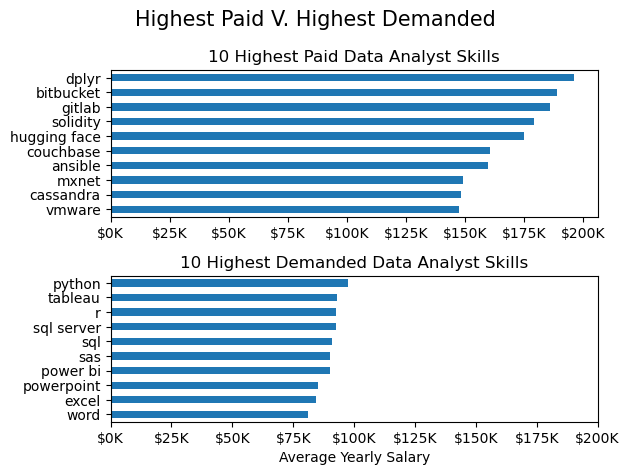

In [5]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_US = df_DA_US.dropna(subset= "salary_year_avg")
df_DA_US = df_DA_US[df_DA_US["salary_year_avg"] > 0]

df_DA_US = df_DA_US.explode("job_skills")
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_top_pay = df_DA_US_group.sort_values(by = "median", ascending = False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by = "count", ascending = False).head(10).sort_values(by="median", ascending = False)
fig, ax = plt.subplots(2, 1)
 
df_DA_top_pay[::-1].plot(kind = "barh", y = "median", ax=ax[0], legend = False)

ax[0].set_title("10 Highest Paid Data Analyst Skills")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

df_DA_skills[::-1].plot(kind = "barh", y = "median", ax=ax[1], legend = False)
ax[1].set_title("10 Highest Demanded Data Analyst Skills")
ax[1].set_xlabel("Average Yearly Salary")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax[1].set_xlim(0,200_000)


plt.suptitle("Highest Paid V. Highest Demanded", fontsize=15)
plt.tight_layout()
plt.show()


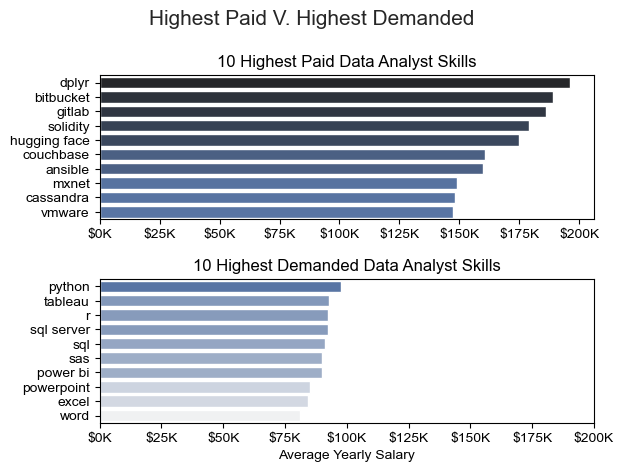

In [11]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_US = df_DA_US.dropna(subset= "salary_year_avg")
df_DA_US = df_DA_US[df_DA_US["salary_year_avg"] > 0]

df_DA_US = df_DA_US.explode("job_skills")
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_top_pay = df_DA_US_group.sort_values(by = "median", ascending = False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by = "count", ascending = False).head(10).sort_values(by="median", ascending = False)
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r" )
ax[0].legend().remove()

# df_DA_top_pay[::-1].plot(kind = "barh", y = "median", ax=ax[0], legend = False)
ax[0].set_title("10 Highest Paid Data Analyst Skills")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))


sns.barplot(data=df_DA_skills, x="median", y=df_DA_skills.index, ax=ax[1], hue="median", palette = "light:b")
ax[1].legend().remove()

# df_DA_skills[::-1].plot(kind = "barh", y = "median", ax=ax[1], legend = False)
ax[1].set_title("10 Highest Demanded Data Analyst Skills")
ax[1].set_xlabel("Average Yearly Salary")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
ax[1].set_xlim(0,200_000)


plt.suptitle("Highest Paid V. Highest Demanded", fontsize=15)
plt.tight_layout()
plt.show()

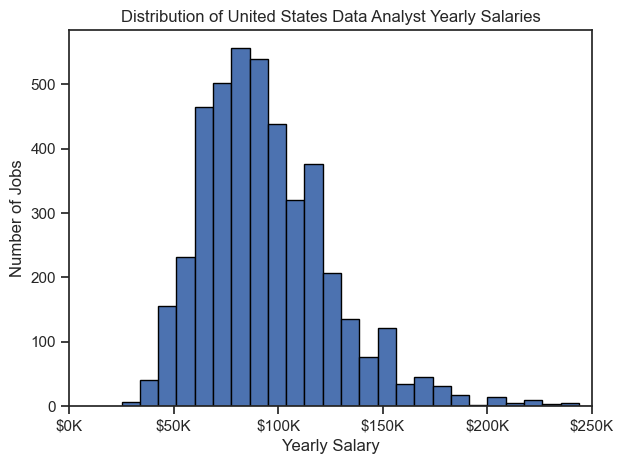

In [12]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()


df_DA_US["salary_year_avg"].plot(kind="hist", bins = 40, edgecolor = "black")
plt.xlim(0,250_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()


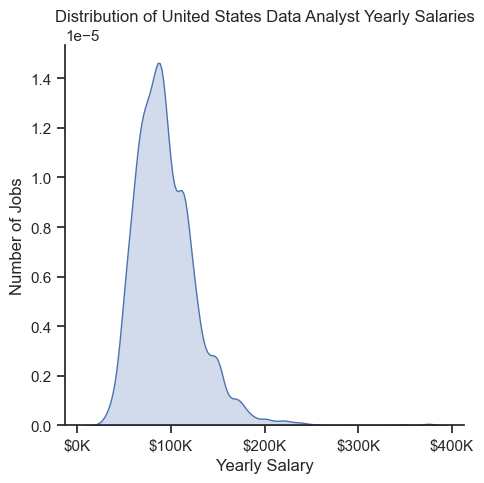

In [18]:
sns.set_theme(style="ticks")
sns.displot(df_DA_US["salary_year_avg"], kind="kde", fill=True)




ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()


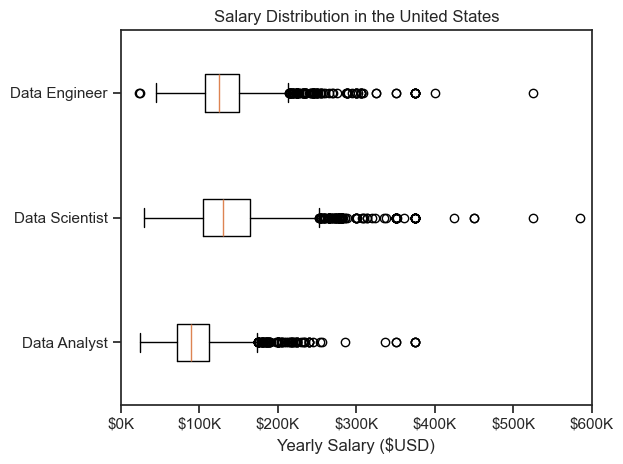

In [19]:
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]
dfj = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")]
dfj = dfj.dropna(subset = "salary_year_avg")
job_list = [dfj[dfj["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
plt.xlim(0,600_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K" ))
plt.tight_layout()
plt.show()

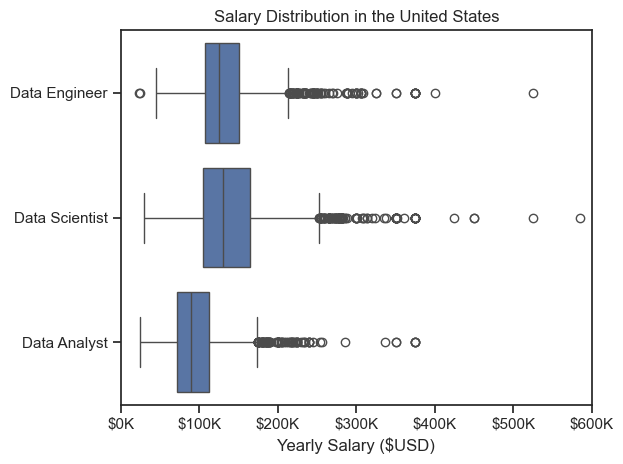

In [21]:
sns.boxplot(data=dfj, x="salary_year_avg", y="job_title_short")
plt.ylabel("")
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
plt.xlim(0,600_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K" ))
plt.tight_layout()
plt.show()